# Titanic Data Analysis

# Saeed Falana
# Ramallah, Palestine

<a id='intro'></a>
# Introduction

> **Purpose**:To performa data analysis on a sample Titanic dataset.
This dataset contains demographics and passenger information. You can view a description of this dataset on the Kaggle website, where the data was obtained https://www.kaggle.com/c/titanic/data.

# Questions


>"One of the reasons that the shipwreck led to such loss of life was that **there were not enough lifeboats for the passengers and crew**, although there was some element of luck involved in surviving the sinking, **some groups of people were more likely to survive than others, such as women, children, and the upper-class**."  https://www.kaggle.com/c/titanic

### What factors made people more likely to survive?


>***1. Were social-economic standing a factor in survival rate?***

>***2.Did age, regardless of sex, determine your chances of survival?***

>***3. Did women and children have preference to lifeboats (survival)?***

>***4.Did women with children have a better survival rate vs women without children (adults 18+)?***

>***5.How did children with nannies fare in comparison to children with parents. Did the nanny "abandon" children to save his/her own life?***

>**Assumption:** I assumed that everyone who survived made it to a  ***life boat*** and  ***it wasn't by chance or luck***.

# Data Wrangling

>***Data Description: from https://www.kaggle.com/c/titanic***

>**survival: 	Survival 	0 = No, 1 = Yes**

>**pclass: 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd**

>**sex:	Sex**

>**Age: 	Age in years**

>**sibsp: 	# of siblings / spouses aboard the Titanic**

>**parch: 	# of parents / children aboard the Titanic**

>**ticket: 	Ticket number**

>**fare:	Passenger fare**

>**cabin: 	Cabin number**	

>**embarked:	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton**

###### Variable Notes


>**pclass: A proxy for socio-economic status (SES)**

>***1st = Upper***

>***2nd = Middle***

>***3rd = Lower***

>**age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5**

>**sibsp: The dataset defines family relations in this way...**

>**Sibling = brother, sister, stepbrother, stepsister**

>**Spouse = husband, wife (mistresses and fiancés were ignored)**

>**parch: The dataset defines family relations in this way...**

>**Parent = mother, father**

>**Child = daughter, son, stepdaughter, stepson**

>**Some children travelled only with a nanny, therefore parch=0 for them.**

>With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.
>   Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
    Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
    Parent: Mother or Father of Passenger Aboard Titanic
    Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
>Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch=0 for them. As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

In [4]:
# Use this cell to set up import statements for all of the packages that you plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
#----------------------------------------------------------#
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Render plots inline
%matplotlib inline

# Read in the dataset, create dataframe
td = pd.read_csv('titanic_data.csv')
# Set style for all graphs
sns.set_style("whitegrid")
# Print the first few records to review data and format
td.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
td.tail()
#td.mean()
#td.mean().std()
#td.sum()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


##### types and look for instances of missing or possibly errant data.
> **Note**: Some values for **Age** are ***NaN***, while **ticket and cabin values** are ***alphanumeric and also missing values with NaN***. Not a big deal but good to know. ***Based on current questions***, **will not require either Ticket or Cabin data.***
###### Additional potential questions from reading data and data description.


>How did children with nannies fare in comparison to children with parents. Did the nanny "abandon" the child to save his/her own life?

>I would need additional information to determine if a child was indeed only on board with a nanny. For example, a child could be on board with an adult sibling. This would make Parch (parent) = 0 but it would be incorrect to say the child had a nanny.

>Need to review list for children with no siblings. These will be children with nannies; however, a child could have siblings and still have a nanny as well.

>Did cabin location play a part in the survival rate without the consideration of class?

>No data on where the cabins are actually located on the Titanic

>External source of this data could probably be found


### Data Cleaning

>**From the data description and questions to answer, I've determined that some dataset columns will not play a part in my analysis and these columns can therefore be removed. This will decluster the dataset and also help with processing performance of the dataset.**
>
>1.PassengerId

>2.Name

>3.Ticket

>4.Cabin

>5.Fare

>6.Embarked


>**I'll take a 3 step approach to data cleanup**

>1.Identify and remove any duplicate entries

>2.Remove unnecessary columns

>3.Fix missing and data format issues


In [6]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#**Step 1 - Remove duplicate entries**
# Concluded that no duplicate entires exist, based on tests below
# Identify and remove duplicate entries

td_duplicates = td.duplicated()
print ('Number of duplicate entries is/are {}'.format(td_duplicates.sum()))

Number of duplicate entries is/are 0


In [7]:
# Let us just make sure this is working
duplicate_test = td.duplicated('Age').head()
print ('Number of entries with duplicate age in top entires are {}'.format(duplicate_test.sum()))
td.head()

Number of entries with duplicate age in top entires are 1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#step 2 - Remove unnecessary columns

#Columns (PassengerId, Name, Ticket, Cabin, Fare, Embarked) removed
# Create new dataset without unwanted columns

td_cleaned = td.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked'], axis=1)
td_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [9]:
# Review some of the missing Age data

missing_age_bool = pd.isnull(td_cleaned['Age'])
td_cleaned[missing_age_bool].head()

,Survived,Pclass,Sex,Age,SibSp,Parch
5,0,3,male,NaN,0,0
17,1,2,male,NaN,0,0
19,1,3,female,NaN,0,0
26,0,3,male,NaN,0,0
28,1,3,female,NaN,0,0


In [10]:
# Determine number of males and females with missing age values

missing_age_female = td_cleaned[missing_age_bool]['Sex'] == 'female'
missing_age_male = td_cleaned[missing_age_bool]['Sex'] == 'male'
print ('Number for females and males with age missing are {} and {} respectively'.format(
missing_age_female.sum(),missing_age_male.sum()))

Number for females and males with age missing are 53 and 124 respectively


In [11]:
#Step 3 - Fix any missing or data format issues

# Calculate number of missing values
td_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [12]:
# Taking a look at the datatypes
td_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


In [13]:
#Missing Age data will affect Q2 - Did age, regardless of sex, determine your chances of survival?
#But graphing and summations shouldn't be a problem since they will be treated as zero(0) value. 
#However, 177(Number of missing value in age Col) is roughly 20% of our 891 sample dataset which seems like a lot to discount.
#Also, this needs to be accounted for if reviewing descriptive stats such as mean age.
#Should keep note of the proportions across male and female
#Age missing in male data: 124
#Age missing in female data: 53
#missing_age_male + missing_age_female=177

<a id='eda'></a>
## Exploratory Data Analysis


In [14]:
# Looking at some typical descriptive statistics
td_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [15]:
# Age min at 0.42 looks a bit weird so give a closer look
td_cleaned[td_cleaned['Age'] < 1]

,Survived,Pclass,Sex,Age,SibSp,Parch
78,1,2,male,0.83,0,2
305,1,1,male,0.92,1,2
469,1,3,female,0.75,2,1
644,1,3,female,0.75,2,1
755,1,2,male,0.67,1,1
803,1,3,male,0.42,0,1
831,1,2,male,0.83,1,1


In [16]:
# Taking a look at some survival rates for babies

youngest_to_survive = td_cleaned[td_cleaned['Survived'] == True]['Age'].min()

youngest_to_die = td_cleaned[td_cleaned['Survived'] == False]['Age'].min()

oldest_to_survive = td_cleaned[td_cleaned['Survived'] == True]['Age'].max()

oldest_to_die = td_cleaned[td_cleaned['Survived'] == False]['Age'].max()

In [17]:
print ('Youngest to survive: {} \nYoungest to die: {} \nOldest to survive: {} \nOldest to die: {}'.format(
youngest_to_survive, youngest_to_die, oldest_to_survive, oldest_to_die))

Youngest to survive: 0.42 
Youngest to die: 1.0 
Oldest to survive: 80.0 
Oldest to die: 74.0


In [18]:
#Data description states that Age can be fractional - Age is in Years; 
#Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5 
#- Therefore, 0.42 appears to be expected and normal data
#Note: An interesting note is that all "new borns" survived. 
#Other notable stats
#Oldest to survive: 80
#Oldest to die: 74
#Youngest to survive: < 1 (0.42)
#Youngest to die: 1

### Question 1 : Were social-economic standing a factor in survival rate?

In [22]:
# Returns survival rate/percentage of sex and class

def survival_rate(pclass, sex):
    grouped_by_total = td_cleaned.groupby(['Pclass', 'Sex']).size()[pclass,sex].astype('float')
    grouped_by_survived_sex = \
        td_cleaned.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sex].astype('float')
    survived_sex_pct = (grouped_by_survived_sex / grouped_by_total * 100).round(2)
    return survived_sex_pct

In [23]:
# Get the actual numbers grouped by class, suvival and sex

groupedby_class_survived_size = td_cleaned.groupby(['Pclass','Survived','Sex']).size()

# Print survival and sex
print ('**----------#1----------**')
print ('female survival rate: {}%'.format(survival_rate(1,'female')))
print ('male survival rate: {}%'.format(survival_rate(1,'male')))
print ('**----------#2----------**')
print ('female survival rate: {}%'.format(survival_rate(2,'female')))
print ('male survival rate: {}%'.format(survival_rate(2,'male')))
print ('**----------#3----------**')
print ('female survival rate: {}%'.format(survival_rate(3,'female')))
print (' male survival rate: {}%'.format(survival_rate(3,'male')))

**----------#1----------**
female survival rate: 96.81%
male survival rate: 36.89%
**----------#2----------**
female survival rate: 92.11%
male survival rate: 15.74%
**----------#3----------**
female survival rate: 50.0%
 male survival rate: 13.54%


In [24]:
#print survived_size
print (groupedby_class_survived_size)

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64


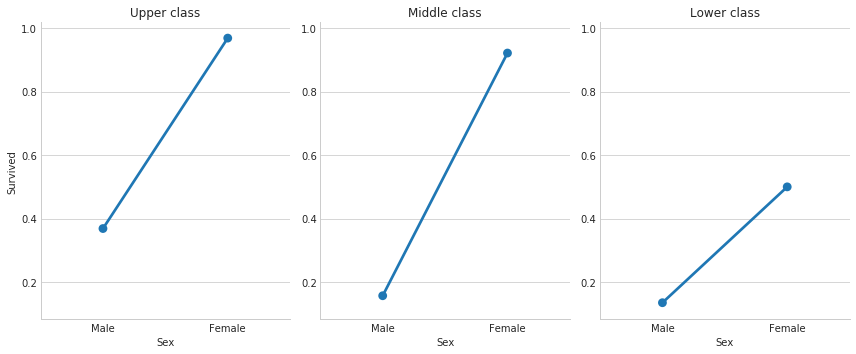

In [25]:
#Based on the raw numbers it would appear as though passengers in **----------#3----------** had a similar survival
#looking at the percentages of the overall passengers per **----------#----------** and the total numbers across
#each **----------#----------**, it can be assumed that a passenger from **----------#1----------**  is about 2.5x 
#times more likely to survive than a passenger in **----------#3----------**.

#Social-economic standing was a factor in survival rate of passengers.
    #**----------#1----------**: 62.96%
    #**----------#2----------**: 47.28%
    #**----------#3----------**: 24.24%
    

# Graph - Grouped by class, survival and sex
#point plot graph 
#Plclass :
 #  (Pclass = Ticket class) 1st = Upper 
 #  (Pclass = Ticket class) 2nd = Middle
 #  (Pclass = Ticket class)3rd = Lower
g = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=td_cleaned, 
                  saturation=.5, kind="point", ci=None, size=5, aspect=.8)
 #Fix up the labels
(g.set_axis_labels('Sex', 'Survived')
    .set_xticklabels(["Male", "Female"])
    .set_titles('{col_name}'))
titles = ['Upper class','Middle class','Lower class']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)


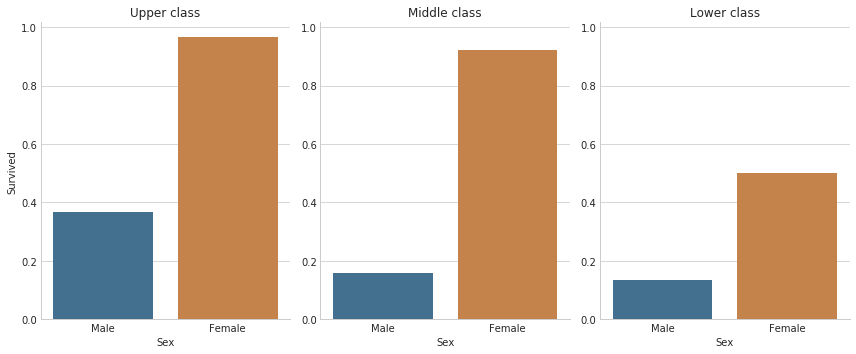

In [26]:
#bar plot Graph (Extra)
#Plclass :
 #  (Pclass = Ticket class) 1st = Upper 
 #  (Pclass = Ticket class) 2nd = Middle
 #  (Pclass = Ticket class)3rd = Lower
g = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=td_cleaned, 
                  saturation=.5, kind="bar", ci=None, size=5, aspect=.8)
 #Fix up the labels
(g.set_axis_labels('Sex', 'Survived')
    .set_xticklabels(["Male", "Female"])
    .set_titles('{col_name}'))
titles = ['Upper class','Middle class','Lower class']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

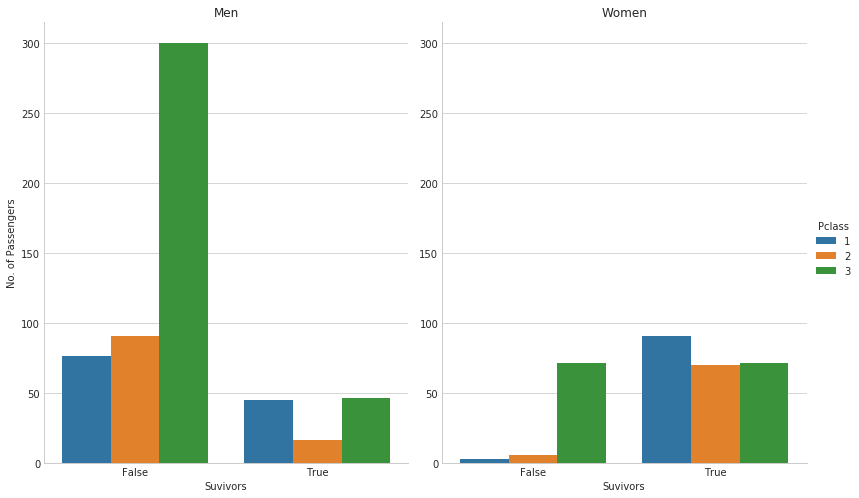

In [27]:
# Graph - Actual count of passengers by survival, group and sex
g = sns.factorplot('Survived', col='Sex', hue='Pclass', data=td_cleaned, kind='count', size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(["False", "True"])
    .set_titles('{col_name}')
)

titles = ['Men', 'Women']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

### Question 2 :Did age, regardless of sex and class, determine your chances of survival?

In [28]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to investigate.

# Let us first identify and get rid of records with missing Age

print ('Number of men and woman with age missing are {} and {} respectively'.format(
missing_age_female.sum(),missing_age_male.sum()))

Number of men and woman with age missing are 53 and 124 respectively


In [29]:
# Drop the NaN values. Calculations will be okay with them (seen as zero) but will throw off averages and counts

td_age_cleaned = td_cleaned.dropna()

In [30]:
# Find total count of survivors and those who didn't
number_survived = td_age_cleaned[td_age_cleaned['Survived'] == True]['Survived'].count()
number_died = td_age_cleaned[td_age_cleaned['Survived'] == False]['Survived'].count()

In [31]:
# Find average of survivors and those who didn't
mean_age_survived = td_age_cleaned[td_age_cleaned['Survived'] == True]['Age'].mean()
mean_age_died = td_age_cleaned[td_age_cleaned['Survived'] == False]['Age'].mean()

In [32]:
# Display a few raw totals
print ('Total number of survivors {} \n\
Total number of non survivors {} \n\
Mean age of survivors {} \n\
Mean age of non survivors {} \n\
Oldest to survive {} \n\
Oldest to not survive {}' \
.format(number_survived, number_died, np.round(mean_age_survived), np.round(mean_age_died), oldest_to_survive, oldest_to_die))

Total number of survivors 290 
Total number of non survivors 424 
Mean age of survivors 28.0 
Mean age of non survivors 31.0 
Oldest to survive 80.0 
Oldest to not survive 74.0


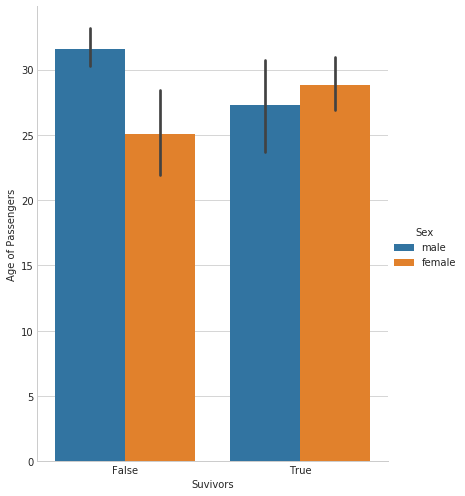

In [33]:
# Graph - Age of passengers across sex of those who survived
g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=td_age_cleaned, kind="bar", size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'Age of Passengers')
    .set_xticklabels(["False", "True"])
)

In [34]:
#Based on the above borplot and calculated data, it would appear that:

    #Regardless of sex, age was not a deciding factor in the passenger survival rate
    #Average age for those who survived and even those who did not survive were inline with eachother

### Question 3 : Did women and children have preference to lifeboats and therefore survival (assuming there was no shortage of lifeboats)?


Assumption: With "child" not classified in the data, I'll need to assume a cutoff point. Therefore, I'll be using today's standard of under 18 as those to be considered as a child vs adult

Category  Survived
Child     0            52
          1            61
Man       0           325
          1            70
Woman     0            47
          1           159
dtype: int64


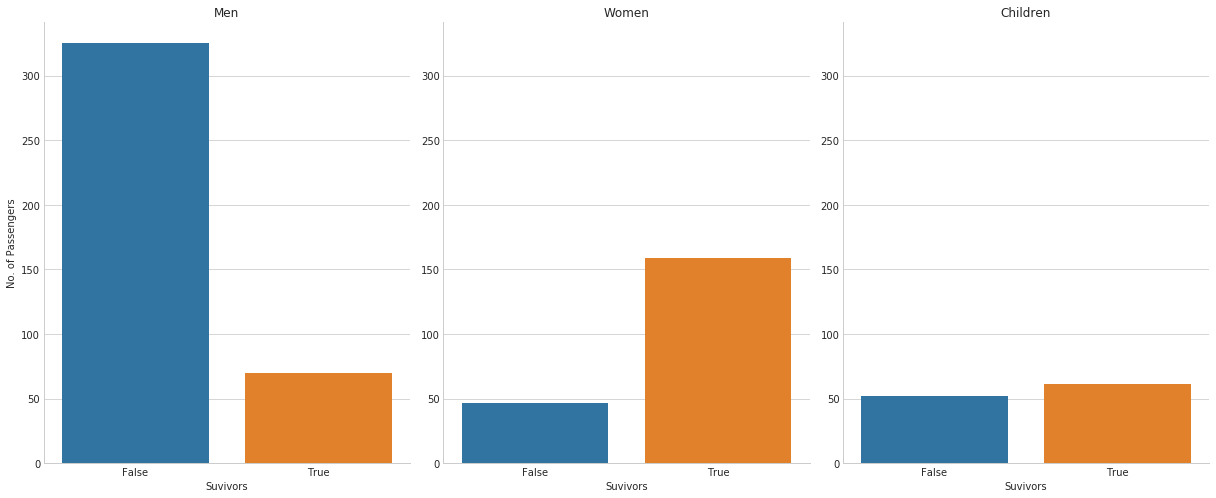

In [51]:
# Create Cateogry column and categorize people
#for Women
td_age_cleaned.loc[
    ( (td_age_cleaned['Sex'] == 'female') & 
    (td_age_cleaned['Age'] >= 18) ),
    'Category'] == 'Woman'
td_age_cleaned.loc[
    ( (td_age_cleaned['Sex'] == 'male') & 
    (td_age_cleaned['Age'] >= 18) ),
    'Category'] == 'Man'
td_age_cleaned.loc[
    (td_age_cleaned['Age'] < 18),
    'Category'] == 'Child'
# Get the totals grouped by Men, Women and Children, and by survival
print (td_age_cleaned.groupby(['Category','Survived']).size())

# Graph - Compare survival count between Men, Women and Children
g = sns.factorplot('Survived', col='Category', data=td_age_cleaned, kind='count', size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(['False', 'True'])
)

titles = ['Men', 'Women', 'Children']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

In [52]:
#The data, and more so, the graphs tends to support the idea that "women and children first" 
#possibly played a role in the survival of a number of people. 
#It's a bit surprising that more children didn't survive but this could possibly be attributed 
#to the mis-representation of what age is considered as the cut off for adults 
#- i.e. if in the 1900's someone 15-17 were considered adults, they would not have been "saved"
#under the "women and children first" idea and would be made to fend for themselves. 
#That would in turn, change the outcome of the above data and possible 
#increase the number of children who survived.

### Question 4 : Did women with children have a better survival rate vs women without children (adults 18+)?

>"Note: Women with children" is referring to parents only

In [53]:
# Determine number of woman that are not parents
td_woman_parents = td_age_cleaned.loc[
    (td_age_cleaned['Category'] == 'Woman') &
    (td_age_cleaned['Parch'] > 0)]

In [54]:
# Determine number of woman over 20 that are not parents
td_woman_parents_maybe = td_age_cleaned.loc[
    (td_age_cleaned['Category'] == 'Woman') &
    (td_age_cleaned['Parch'] > 0) & 
    (td_age_cleaned['Age'] > 20)]

In [55]:
td_woman_parents.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Category
8,1,3,female,27.0,0,2,Woman
25,1,3,female,38.0,1,5,Woman
88,1,1,female,23.0,3,2,Woman
98,1,2,female,34.0,0,1,Woman
136,1,1,female,19.0,0,2,Woman


In [56]:
td_woman_parents_maybe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Category
8,1,3,female,27.0,0,2,Woman
25,1,3,female,38.0,1,5,Woman
88,1,1,female,23.0,3,2,Woman
98,1,2,female,34.0,0,1,Woman
167,0,3,female,45.0,1,4,Woman


In [57]:
#After reviewing the data, and giving it a bit more thought, 
#I noticed a issue which I didn't think of before i.e A woman with Age: 23 
#and Parch: 2 could be onboard with her children OR onboard with her parents. 
#Based on the 'Parch' definition provided in the data description, 
#Parch - number of parents or children on board, 
#I don't believe it's possible to accurately determine women with children (parents) vs women with their parents onboard.

### Question 5 : How did children with nannies fare in comparison to children with parents. Did the nanny "abandon" children to save his/her own life?

>* Need to review list for children with no parents. These will be children with nannies as stated in the data description
>*Compare "normal" survival rate of children with parents against children with nannies

>**Assumptions:**
>If you're classified as a 'Child' (under 18) and have Parch > 0, then the value is associated to your Parents, eventhough it is possible to be under 18 and also have children

>Classifying people as 'Child' represented by those under 18 years old is applying today's standards to the 1900 century

In [58]:
# Separate out children with parents from those with nannies 
td_children_nannies = td_age_cleaned.loc[
    (td_age_cleaned['Category'] == 'Child') &
    (td_age_cleaned['Parch'] == 0)]

td_children_parents = td_age_cleaned.loc[
    (td_age_cleaned['Category'] == 'Child') &
    (td_age_cleaned['Parch'] > 0)]

In [59]:
# Determine children with nannies who survived and who did not
survived_children_nannies = td_children_nannies.Survived.sum()

total_children_nannies = td_children_nannies.Survived.count()

pct_survived_nannies = ((float(survived_children_nannies)/total_children_nannies)*100)

pct_survived_nannies = np.round(pct_survived_nannies,2)

survived_children_nannies_avg_age = np.round(td_children_nannies.Age.mean())

In [60]:
# Display results
print ('Total number of children with nannies: {}\n\
Children with nannies who survived: {}\n\
Children with nannies who did not survive: {}\n\
Percentage of children who survived: {}%\n\
Average age of surviving children: {}'\
.format(total_children_nannies, survived_children_nannies, 
        total_children_nannies-survived_children_nannies, pct_survived_nannies, survived_children_nannies_avg_age))

Total number of children with nannies: 32
Children with nannies who survived: 16
Children with nannies who did not survive: 16
Percentage of children who survived: 50.0%
Average age of surviving children: 15.0


In [61]:
# Verify counts (looked a bit too evenly divided)
td_children_nannies.loc[td_children_nannies['Survived'] == 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Category
9,1,2,female,14.0,1,0,Child
22,1,3,female,15.0,0,0,Child
39,1,3,female,14.0,1,0,Child
84,1,2,female,17.0,0,0,Child
125,1,3,male,12.0,1,0,Child
156,1,3,female,16.0,0,0,Child
208,1,3,female,16.0,0,0,Child
220,1,3,male,16.0,0,0,Child
307,1,1,female,17.0,1,0,Child
389,1,2,female,17.0,0,0,Child


In [62]:
# Determine children with parents who survived and who did not
survived_children_parents = td_children_parents.Survived.sum()

total_children_parents = td_children_parents.Survived.count()

pct_survived_parents = ((float(survived_children_parents)/total_children_parents)*100)

pct_survived_parents = np.round(pct_survived_parents,2)

survived_children_parents_avg_age = np.round(td_children_parents.Age.mean())

In [63]:
# Display results
print ('Total number of children with parents: {}\n\
Children with parents who survived: {}\n\
Children with parents who did not survive: {}\n\
Percentage of children who survived: {}%\n\
Average age of surviving children: {}'\
.format(total_children_parents, survived_children_parents, 
        total_children_parents-survived_children_parents, pct_survived_parents,survived_children_parents_avg_age))

Total number of children with parents: 81
Children with parents who survived: 45
Children with parents who did not survive: 36
Percentage of children who survived: 55.56%
Average age of surviving children: 7.0


In [64]:
#Based on the data analysis above, it would appear that the survival rate for children who were
#accompanied by parents vs those children accompanied by nannies was slighly higher for those with parents. 
#The slight increase could be due to the average age of children with parents being younger, 
#almost half, that of children with nannies.

    #Percentage of children with nannies who survived: 50.0%
    #Percentage of children with parents who survived: 55.56%
    #Average age of surviving children with nannies: 15
    #Average age of surviving children with parents: 7.0



<a id='conclusions'></a>
## Conclusions

> The results of the analysis, although tentative, would appear to indicate that class and sex, namely, being a **female with upper social-economic standing (first class), would give one the best chance of survival when the tragedy occurred on the Titanic**.

>**Age did not seem to be a major factor.**

>**man in third class, gave one the lowest chance of survival.**

>Women and children, across all classes, tend to have a ***higher survival rate*** than ***men*** in genernal but by no means did being a child or woman guarentee survival.

>**overall, children accompanied by parents (or nannies) had the ***best survival*** **rate at over 50%.


#### Issues

>A portion of men and women did not have Age data and were removed from calculations which could have skewed some numbers

>The category of 'children' was assumed to be anyone under the age of 18, using today's North American standard for adulthood which was certainly not the case in the 1900s

## References

> https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3865739/ 

>https://www.kaggle.com/c/titanic/data 

>https://classroom.udacity.com

>www.youtube.com

>http://ipython.readthedocs.io/en/stable/interactive/magics.html


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0